# Statistics Review

<a href="https://colab.research.google.com/github/febse/ts2025/blob/main/03-Statistics-Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The Expected Value

For a discrete random variable $X$ taking values $x_i$ with probabilities $p_i$, the expected value is defined as:

$$
E(X) = \sum_i x_i p_i
$$

With the following distribution as an example:

| x | 0 | 1 | 2 | 3 |
|---|---|---|---|---|
| p | 0.25 | 0.095 | 0.272 | 0.383 |

The expected value is calculated as:

$$
E(X) = 0 \cdot 0.25 + 1 \cdot 0.095 + 2 \cdot 0.272 + 3 \cdot 0.383 = 1.788
$$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Switch off autocompletions (for learning purposes)

%config CompleterManager.use_jedi = False

np.random.seed(42)

example = np.random.choice([0, 1, 2], size=10, p=[0.2, 0.5, 0.3])
example

array([1, 2, 2, 1, 0, 0, 0, 2, 1, 2])

In [3]:
# The average is

example.mean()

np.float64(1.1)

In [4]:
# Which computes

(1 + 2 + 2 + 1 + 0 + 0 + 0 + 2 + 1 +  2) / 10

1.1

In [5]:
# But we can also compute the frequency of each value

pd.Series(example).value_counts(normalize=True)

2    0.4
1    0.3
0    0.3
Name: proportion, dtype: float64

In [6]:
# And compute the average value from that

0 * 0.3 + 1 * 0.3 + 2 * 0.4

1.1

In [7]:
px = pd.read_csv("https://github.com/febse/data/raw/refs/heads/main/ts/review/px.csv")
px

,x,p
0,0,0.250
1,1,0.095
2,2,0.272
3,3,0.383


In [8]:
E_x = (px["x"] * px["p"]).sum()
E_x

np.float64(1.788)

Text(0.5, 0, 'x')

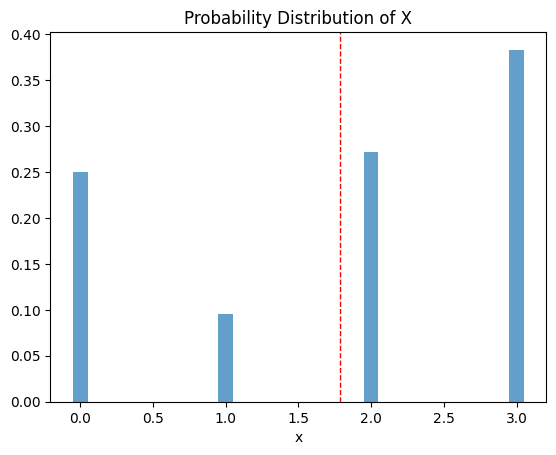

In [9]:
plt.bar(px["x"], px["p"], width=0.1, alpha=0.7)
plt.axvline(E_x, color='red', linestyle='dashed', linewidth=1)
plt.title("Probability Distribution of X")
plt.xlabel("x")

The law of large numbers states that as the number of trials increases, the sample mean converges to the expected value. You can see this in action by sampling from the distribution multiple times and calculating the sample mean.

The following simulation selects 10,000 samples of size 2,000 each from the distribution of $X$. In other words we play the game of selecting a value from the distribution 2,000 times, and we repeat this process 10,000 times. For each sample, we calculate the mean and plot a histogram of these sample means.

Note how the width of the histogram decreases as the sample size increases, and how the sample means cluster around the expected value (red dashed line).

In [10]:
# Create 10 000 samples of size 2 000 from the distribution of X
# Then calculate the mean of each sample (so we get 10 000 sample means)

samples = np.random.choice(px["x"], size=(10_000, 200), p=px["p"])
samples_means = samples.mean(axis=1)
samples_means

array([1.65 , 1.875, 1.83 , ..., 1.74 , 1.845, 1.67 ], shape=(10000,))

Text(0.5, 1.0, 'Histogram of Sampled Values')

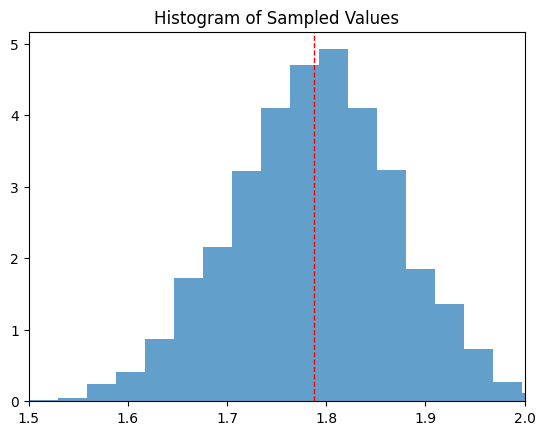

In [11]:
# Look at the distribution of the samples
# Try changing the size of each sample by changing 2_000 to 20 or 200
# and look at the histogram below again

plt.hist(samples_means, bins=20, density=True, alpha=0.7)
plt.xlim([1.5, 2])
plt.axvline(E_x, color='red', linestyle='dashed', linewidth=1)
plt.title("Histogram of Sampled Values")


In [12]:
py = pd.read_csv("https://github.com/febse/data/raw/refs/heads/main/ts/review/py.csv")
py

,y,p
0,2,0.76
1,3,0.24


In [13]:
# Calculate the expected value of Y


### Variance

The variance of a random variable $X$ is defined as:

$$
Var(X) = E[(X - E(X))^2] = E[X^2] - (E[X])^2
$$

For a discrete random variable the expected value is simply a sum (just as above):

$$
Var(X) = \sum_i (x_i - E(X))^2 p_i
$$

It measures how _different_ the values of the random variable are from the expected value. A distribution (random variable) with zero variance means that the random variable always takes the same value (the expected value).

For the example distribution above, the variance is:

$$
Var(X) = (0 - 1.788)^2 \cdot 0.25 + (1 - 1.788)^2 \cdot 0.095 + (2 - 1.788)^2 \cdot 0.272 + (3 - 1.788)^2 \cdot 0.383 = 1.054
$$

or using the other formula:

$$
E[X^2] = 0^2 \cdot 0.25 + 1^2 \cdot 0.095 + 2^2 \cdot 0.272 + 3^2 \cdot 0.383 = 4.63
$$

$$
Var(X) = 4.095 - (1.788)^2 = 1.433056
$$

The square root of the variance is called the standard deviation:

$$
SD(X) = \sqrt{Var(X)} = 1.197
$$


In [14]:
var_x = (((px["x"] - E_x) ** 2 )* px["p"]).sum()
var_x

np.float64(1.433056)

In [15]:
sd_x = np.sqrt(var_x)
sd_x

np.float64(1.1971031701570254)

In [16]:
# Calculate the variance and standard deviation of Y using
# both the direct formula and the shortcut formula, also compute it manually 
# on paper



## Joint Probability Distributions
 

Until now we have seen the distribution of a single variable. For many application, however, we need to deal with multiple random variables. For example in the context of time series analysis we view the time series (observed values) like (1.3, 2, 7, 2.4), etc as a single realization of a process (a sequence of random variables):

$$
X_1, X_2, X_3, X_4
$$

Where each random variable has produced a single value, for example $X_1$ was played and produced 1.3, $X_2$ gave 2, $X_3$ gave 7 and finally $X_4$ produced 2.4. The univariate distributions that we studied until now describe 
the individual variables but fail to capture dependencies between them. For that we need their joint distribution. In the following we limit the discussion to two variables for simplicity and use $X$ and $Y$ to denote them for consistency with the introductory statistics literature.

In the discrete case, the joint probability distribution of two random variables $X$ and $Y$ answers the question: how likely is it that $X$ takes the value $x_i$ and $Y$ takes the value $y_j$ at the same time? This is denoted as $P(X = x_i, Y = y_j)$ or simply $P(x_i, y_j)$. The joint distribution can be represented as a table:

In [17]:
#| label: tab-joint-distribution
#| fig-cap: "Joint Probability Distribution of X and Y"

pxy = pd.read_csv("https://github.com/febse/data/raw/refs/heads/main/ts/review/pxy.csv")[['x', 'y', 'p']]
pxy.pivot(
    index='x',
    columns='y',
    values='p'
).add_prefix('y=')

y,y=2,y=3
x,,
0,0.241,0.009
1,0.089,0.006
2,0.229,0.043
3,0.201,0.182


Looking at the distribution in @tab-joint-distribution we can say that the probability of 
X = 0 and Y = 2 is 0.241 (thee top left cell). Similarly, the probability of X = 2 and Y = 3 is 0.43 ($P(X = 2, Y = 3) = 0.43$).

To get the marginal distribution of $X$ from the joint distribution, we ask the question: what is the probability that $X$ takes the value $0$? From the table we can see that this can happen in two different ways: either $Y$ is $2$ or $Y$ is $3$. Both events cannot occur at the same time, so these two events are disjoint and we can sum their probability to find the probability of their union.

$$
P(X = 0) = P(X = 0, Y = 2) + P(X = 0, Y = 3) = 0.241 + 0.009 = 0.25
$$

We can continue in the same way to get the full *marginal distribution* of $X$ (by summing across the rows).

In [18]:
#| label: tab-marginal-x
#| tab-cap: "Marginal Probability Distribution of X"

px_marginal = pxy.groupby('x')['p'].sum().reset_index()
px_marginal

,x,p
0,0,0.250
1,1,0.095
2,2,0.272
3,3,0.383


### Conditional Distributions



For every possible value of $X$ we can derive the _conditional distribution_ of $Y$ given that value of $X$. For example, if we know that $X=0$ has occurred, we can look at the distribution of $Y$ values that occur when $X=0$. The joint distribution assigns a probability of 0.241 for $x = 0$ and $y = 2$ and a probability of 0.009 for $x = 0$ and $y = 0$. In order to get the _conditional_ probabilities for $y = 2$ and $y=3$ given that $x=0$, we need to normalize these probabilities by dividing them by the total probability of $x=0$ (which is 0.241 + 0.009 = 0.25). 

The conditional probability $P(Y=2|X=0)$ is therefore $\frac{P(X=0, Y=2)}{P(X=0)} = \frac{0.241}{0.25} = 0.964$ and similarly $P(Y=3|X=0) = \frac{0.009}{0.25} = 0.036$.

Note that the sum of the conditional probabilities for $Y$ given $X=0$ is 1 (0.964 + 0.036 = 1).

In [19]:
# Keep the rows where x=1 and select only the columns y and p
pxy_x0 = pxy[pxy['x'] == 0][['y', 'p']]

# Divide the joint probabilities by the marginal probability of x=1
pxy_x0["p(y|x=0)"] = pxy_x0['p'] / pxy_x0['p'].sum()
pxy_x0


,y,p,p(y|x=0)
0,2,0.241,0.964
1,3,0.009,0.036


We can repeat this process for every possible value of $X$ to get the full set of conditional distributions of $Y$ given $X$.

In [20]:
# First, we need to compute the marginal distribution of X
pxy["p(x)"] = pxy.groupby('x')['p'].transform('sum')
pxy

,x,y,p,p(x)
0,0,2,0.241,0.250
1,0,3,0.009,0.250
2,1,2,0.089,0.095
3,1,3,0.006,0.095
4,2,2,0.229,0.272
5,2,3,0.043,0.272
6,3,2,0.201,0.383
7,3,3,0.182,0.383


In [21]:
# Then we can divide the joint probabilities by the marginal probabilities (p(x))
pxy["p(y|x)"] = pxy['p'] / pxy['p(x)']
pxy

,x,y,p,p(x),p(y|x)
0,0,2,0.241,0.250,0.964000
1,0,3,0.009,0.250,0.036000
2,1,2,0.089,0.095,0.936842
3,1,3,0.006,0.095,0.063158
4,2,2,0.229,0.272,0.841912
5,2,3,0.043,0.272,0.158088
6,3,2,0.201,0.383,0.524804
7,3,3,0.182,0.383,0.475196


In [22]:
# Finally, we can pivot the table so that we can see the conditional distributions
# as rows for each value of X

pxy.pivot(
    index='x',
    columns='y',
    values='p(y|x)'
)

y,2,3
x,,
0,0.964000,0.036000
1,0.936842,0.063158
2,0.841912,0.158088
3,0.524804,0.475196


Note that the result of our manual calculations for $P(Y=y|X = 0)$ appears in the first row of the table above.

Note that the conditional distributions are different for different values of $X$. For example, the probability of $Y=2$ is 0.964 when $X=0$, but only 0.525 when $X=3$. This means that knowing the value of $X$ gives us information about the likely values of $Y$. In other words, $X$ and $Y$ are not independent variables.

In [23]:
# Exercise: derive the conditional distribution of X given Y using the same approach


### Independence

In case when knowing the value of one variable does not give us any information about the likely values of the other variable, we say that the two variables are independent. Formally, we can express this as:

$$
P(Y=y|X=x) = P(Y=y)
$$

and equivalently:

$$
P(X=x, Y=y) = P(X=x) \cdot P(Y=y)
$$

The last formula informs us that under independence the joint probability distribution is simply the product of the marginal distributions.


In [24]:
# Construct the joint distribution of X and Y under independence using
# the marginal distributions px and py

pxy_indep = px.merge(py, how='cross')
pxy_indep['p'] = pxy_indep['p_x'] * pxy_indep['p_y']
pxy_indep

,x,p_x,y,p_y,p
0,0,0.250,2,0.76,0.19000
1,0,0.250,3,0.24,0.06000
2,1,0.095,2,0.76,0.07220
3,1,0.095,3,0.24,0.02280
4,2,0.272,2,0.76,0.20672
5,2,0.272,3,0.24,0.06528
6,3,0.383,2,0.76,0.29108
7,3,0.383,3,0.24,0.09192


If you derive the conditional distribution of $X$ given $Y$ using the same approach as above you will end up with identical conditional distributions.

In [25]:
# The conditional distribution of Y given X under independence

pxy_indep["p(x)"] = pxy_indep.groupby('x')['p'].transform('sum')
pxy_indep['p(y|x)'] = pxy_indep['p'] / pxy_indep['p(x)']
pxy_indep.pivot(
    index='x',
    columns='y',
    values='p(y|x)'
).add_prefix('P(y=').add_suffix('|X=x)')

y,P(y=2|X=x),P(y=3|X=x)
x,,
0,0.76,0.24
1,0.76,0.24
2,0.76,0.24
3,0.76,0.24


### Covariance and Correlation

It is useful to start with the definition of the sample covariance between two sets of values $X$ and $Y$:

$$
S_{xy} = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$$

and the correlation:

$$
-1 \leq r_{xy} = \frac{S_{xy}}{S_x S_y} \leq 1
$$

where $S_x$ and $S_y$ are the sample standard deviations of $X$ and $Y$ respectively.

To understand these formulas and their purpose it is helpful simulate some data with known dependencies and see how covariance and correlation can capture those.

The following piece of code generates a sample of size 100 for two variables: $x$ and $y$. The variable $y$ is generated as a linear function of $x$ plus some random noise.

$$
y_t = 3x_t + e_t, e_t \sim N(0,5)
$$


In [26]:
x = np.random.normal(loc=10, scale=2, size=100)
y = 3 * x + np.random.normal(loc=0, scale=5, size=100)

pd.DataFrame({'x': x, 'y': y}).head()

,x,y
0,9.051036,22.092826
1,8.304392,27.468984
2,10.438223,36.077805
3,10.892145,24.393660
4,6.047166,15.522903


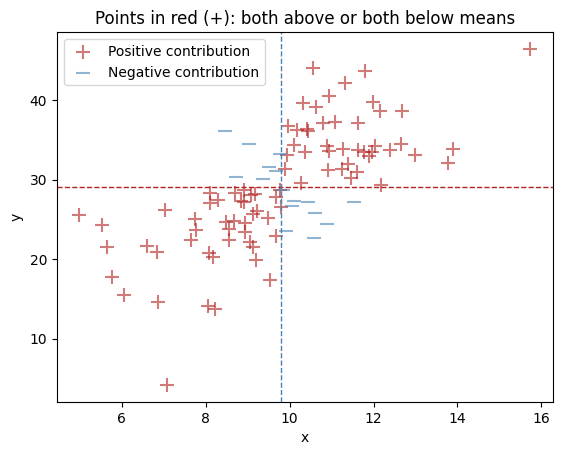

In [27]:
#| label: fig-cov-corr
#| fig-cap: "Scatter Plot of X and Y with Means Indicated"

# Calculate means
mean_x = np.mean(x)
mean_y = np.mean(y)

# Separate points into two groups
x_pos = []
y_pos = []
x_neg = []
y_neg = []

for xi, yi in zip(x, y):
    if (xi > mean_x and yi > mean_y) or (xi < mean_x and yi < mean_y):
        x_pos.append(xi)
        y_pos.append(yi)
    else:
        x_neg.append(xi)
        y_neg.append(yi)

# Plot positive covariance points as red +
plt.scatter(x_pos, y_pos, c='firebrick', marker='+', s=100, alpha=0.6, label='Positive contribution')

# Plot negative covariance points as blue -
plt.scatter(x_neg, y_neg, c='steelblue', marker='_', s=100, alpha=0.6, label='Negative contribution')

plt.axhline(y=mean_y, color='firebrick', linestyle='dashed', linewidth=1)
plt.axvline(x=mean_x, color='steelblue', linestyle='dashed', linewidth=1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Points in red (+): both above or both below means")
plt.legend()

@fig-cov-corr shows a scatter plot of the generated data with a focus on the cross-products that enter the covariance formula: $(x_i - \bar{x})(y_i - \bar{y})$. The vertical and the horizontal lines show the means of $x$ and $y$ respectively, dividing the plot into four quadrants. Each point in the scatter plot corresponds to a term in the sum of the covariance formula. Let's look at the sign of these cross-products in each quadrant:

1. Top-right quadrant: Here both $(x_i - \bar{x})$ and $(y_i - \bar{y})$ are positive, so their product is positive.
2. Bottom-left quadrant: Here both $(x_i - \bar{x})$ and $(y_i - \bar{y})$ are negative, so their product is also positive (a negative times a negative is a positive).
3. Top-left quadrant: Here $(x_i - \bar{x})$ is negative while $(y_i - \bar{y})$ is positive, so their product is negative.
4. Bottom-right quadrant: Here $(x_i - \bar{x})$ is positive while $(y_i - \bar{y})$ is negative, so their product is negative.

The covariance is in effect the average of these cross-products. In our example, most points fall into the top-right and bottom-left quadrants, leading to a positive covariance (even though they cancel out with some of the negative products from the other two quadrants).

Let's compute the covariance for these data:

In [28]:
np.cov(x, y).round(1)

array([[ 3.6,  9.6],
       [ 9.6, 52.6]])

It may be a little bit confusing at first because the `np.cov` function returns a whole matrix (called the covariance matrix) where the diagonal elements are the variances of each variable and the off-diagonal elements are the covariances between the variables.

What is the relationship between covariance and variance? Looking at the covariance formula, if we compute the covariance of a variable with itself, we get:

$$
S_{xx} = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})(x_i - \bar{x}) = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2 = S_x^2
$$

which is simply the variance of $X$. So the covariance between our two variables is the value in the off-diagonal elements of the covariance matrix. When you compare these elements you will notice that they are equal (the covariance matrix is symmetric).

So the sign of the covariance informs us about the direction of the linear relationship between the two variables: a positive covariance indicates that when one variable is above its mean, the other variable tends to be above its mean as well (and vice versa), so the values tend to scatter along a line with a positive slope.

Unfortunately, the absolute value of the covariance is hard to interpret because it changes when we change the scale (unit of measurement) of the data. Look how it changes when we multiply all values of $x$ by 100.

When you multiply it by 100, the covariance also gets multiplied by 100. 

In [29]:
np.cov(100 * x, y).round(1)

array([[36361.8,   959.2],
       [  959.2,    52.6]])

## Correlation

The correlation is a scaled version of the covariance that is not affected by the scale of the data. It is computed by dividing the covariance by the product of the standard deviations of the two variables:

$$
-1 \leq r_{xy} = \frac{S_{xy}}{S_x S_y} \leq 1
$$

It ranges between -1 and 1, where values close to 1 indicate a strong positive linear relationship, values close to -1 indicate a strong negative linear relationship, and values close to 0 indicate little to no *linear* relationship.

It helps to think about the measurement units of the covariance and the correlation. Because of the cross-products in the covariance formula ($(x_i - \bar{x})(y_i - \bar{y})$), the units of the covariance are the product of the units of $X$ and $Y$. For example, if $X$ is measured in meters and $Y$ in seconds, the covariance will be in meter-seconds. This makes it hard to interpret the magnitude of the covariance.

The standard deviation of $X$ is measured in the same units as $X$ (meters in our example), and the standard deviation of $Y$ is measured in the same units as $Y$ (seconds in our example). Therefore, when we divide the covariance by the product of the standard deviations ($S_x S_y$), the units cancel out:

$$
\text{Units of } r_{xy} = \frac{\text{Units of } S_{xy}}{\text{Units of } S_x \cdot \text{Units of } S_y} = \frac{\text{meters} \cdot \text{seconds}}{\text{meters} \cdot \text{seconds}} = 1
$$

:::{.callout-note}
## Correlation and the Regression Line

You should not confuse correlation with the slope of the regression line. The correlation only measure how close the points are to a straight line, it does not tell you _anything_ about how large the slope of that line is. Two datasets can have the same correlation but very different slopes for their regression lines.

In a linear regression 

$$
y_t = \beta_0 + \beta_1 x_t + e_t
$$

the slope $\beta_1$ is given by:

$$
\beta_1 = r_{xy} \frac{S_y}{S_x}
$$

So the correlation is only equal to the slope when the standard deviations when the two variables have the same standard deviation (for example because both have been standardized).

:::

In [30]:
np.corrcoef(x, y).round(1)

array([[1. , 0.7],
       [0.7, 1. ]])

Just as `np.cov` returns a whole matrix, `np.corrcoef` outputs a whole correlation matrix.
The entries on the main diagonal are always ones, because these are the correlations of the variables with themselves.

In [31]:
# Note that the correlation does not depend on the scale
# of the variables as does the covariance

np.corrcoef(100 * x, y).round(1)

array([[1. , 0.7],
       [0.7, 1. ]])

## Correlation and Standardization

We have seen that the covariance is scale-dependent and that the correlation overcomes this problem by standardizing the covariance. Another way to think about this is to transform the original variables into standardized variables (also called z-scores) before computing the covariance. The standardized variable $Z_x$ for a variable $X$ is computed as:

$$
Z_x = \frac{X - E(X)}{SD(X)}
$$

In our case we have empirical data for which we compute the sample mean and sample standard deviation:

$$
Z_x = \frac{X - \bar{X}}{S_x}
$$

Note that for correlation it is not necessary to subtract the mean because the standard deviation takes care of scaling the data appropriately.

In [32]:
# Let's do this for our variables x and y

E_x = np.mean(x)
E_y = np.mean(y)

sd_x = np.std(x, ddof=1)
sd_y = np.std(y, ddof=1)

print(f"x has mean {E_x:.2f} and standard deviation {sd_x:.2f}")
print(f"y has mean {E_y:.2f} and standard deviation {sd_y:.2f}")

x has mean 9.81 and standard deviation 1.91
y has mean 29.02 and standard deviation 7.25


In [ ]:
# Now subtract the means and divide by the standard deviations

x_std = (x - E_x) / sd_x
y_std = (y - E_y) / sd_y

# Check the means and standard deviations of the standardized variables

print(f"x_std has mean {np.mean(x_std):.2f} and standard deviation {np.std(x_std, ddof=1):.2f}")
print(f"y_std has mean {np.mean(y_std):.2f} and standard deviation {np.std(y_std, ddof=1):.2f}")

x_std has mean 5.14 and standard deviation 1.00
y_std has mean 4.00 and standard deviation 1.00


In [37]:
# Now compute the covariance of the standardized variables

cov_std = np.cov(x_std, y_std)
cov_std

array([[1.        , 0.69369435],
       [0.69369435, 1.        ]])

In [38]:
# And compare it to the correlation coefficient

np.corrcoef(x, y).round(2)


array([[1.  , 0.69],
       [0.69, 1.  ]])